<a href="https://colab.research.google.com/github/iuliastremciuc/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/IS_132_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [214]:
import numpy as np
import pandas as pd
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
def mean_var_std(list):
  mean = sum(list) / len(list)
  var = sum((list - mean)**2) / (len(list) - 1) # do we need populatiion or sample
  std = np.sqrt(var)
  return mean, var, std

mean_var_std(sales)
 

(3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [216]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])
#used the stack function to combine lists
sales_customers = np.stack((sales, customers))
print(sales_customers)
print(np.cov(sales_customers))

[[3505 2400 3027 2798 3700 3250 2689]
 [ 127   80  105   92  120  115   93]]
[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [51]:
sales_std = np.std(sales, ddof = 1)
customers_std = np.std(customers, ddof = 1)
print(sales_std)
print(customers_std)

463.0204150595357
17.057326313123664


In [0]:
#What does mean'standartize the covariance'?


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [217]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_data.head(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,6,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,7,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,8,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,9,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,10,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [218]:
titanic_numeric = titanic_data.select_dtypes(include = 'number')
titanic_numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [0]:
#should I keep NaN values or drop them?
cleaned_titanic = titanic_numeric.dropna()
cleaned_titanic = cleaned_titanic.drop(['survived'], axis = 1)

In [228]:
cleaned_titanic.describe()

,Unnamed: 0,pclass,age,sibsp,parch,fare,body,has_cabin_number
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,605.458333,2.158333,36.028176,0.350000,0.283333,32.033438,159.975000,0.266667
std,386.711407,0.850070,14.028960,0.894897,0.851922,42.550246,97.672103,0.444071
min,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,247.750000,1.000000,25.750000,0.000000,0.000000,8.050000,71.500000,0.000000
50%,515.000000,2.000000,33.000000,0.000000,0.000000,14.477100,154.000000,0.000000
75%,903.500000,3.000000,46.000000,0.250000,0.000000,29.775000,255.250000,1.000000
max,1307.000000,3.000000,71.000000,8.000000,5.000000,227.525000,328.000000,1.000000


In [229]:
cleaned_titanic.var(ddof = 1)

Unnamed: 0          149545.712535
pclass                   0.722619
age                    196.811725
sibsp                    0.800840
parch                    0.725770
fare                  1810.523420
body                  9539.839706
has_cabin_number         0.197199
dtype: float64

In [230]:
cleaned_titanic.cov()

,Unnamed: 0,pclass,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,149545.712535,295.683123,-2380.187123,33.535714,35.835434,-8275.289466,74.095588,-94.711485
pclass,295.683123,0.722619,-5.854237,0.044958,0.064006,-21.314407,-3.609454,-0.252661
age,-2380.187123,-5.854237,196.811725,-2.098180,-0.197126,160.509930,61.705181,2.593264
sibsp,33.535714,0.044958,-2.098180,0.800840,0.168908,8.326293,-8.486975,-0.018487
parch,35.835434,0.064006,-0.197126,0.168908,0.725770,5.140167,4.511345,0.016246
fare,-8275.289466,-21.314407,160.509930,8.326293,5.140167,1810.523420,-179.164684,10.117269
body,74.095588,-3.609454,61.705181,-8.486975,4.511345,-179.164684,9539.839706,3.880672
has_cabin_number,-94.711485,-0.252661,2.593264,-0.018487,0.016246,10.117269,3.880672,0.197199


In [231]:
cleaned_titanic.corr()

,Unnamed: 0,pclass,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.899466,-0.438731,0.096905,0.108774,-0.502914,0.001962,-0.551523
pclass,0.899466,1.000000,-0.490897,0.059099,0.088382,-0.589273,-0.043473,-0.669316
age,-0.438731,-0.490897,1.000000,-0.167126,-0.016494,0.268890,0.045032,0.416264
sibsp,0.096905,0.059099,-0.167126,1.000000,0.221552,0.218664,-0.097098,-0.046521
parch,0.108774,0.088382,-0.016494,0.221552,1.000000,0.141800,0.054217,0.042945
fare,-0.502914,-0.589273,0.268890,0.218664,0.141800,1.000000,-0.043110,0.535438
body,0.001962,-0.043473,0.045032,-0.097098,0.054217,-0.043110,1.000000,0.089471
has_cabin_number,-0.551523,-0.669316,0.416264,-0.046521,0.042945,0.535438,0.089471,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

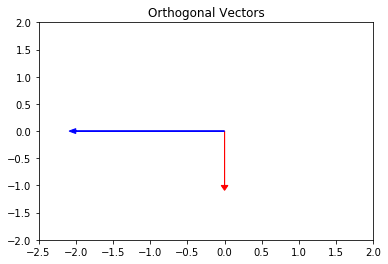

In [232]:
# perpendicular is a synonym for orthogonal
import matplotlib.pyplot as plt

vector_1 = [0, -1]
vector_2 = [-2, 0]

# Plot the Scaled Vectors
plt.arrow(0, 0, 0, -1,head_width=.09, head_length=0.09, color ='red')
plt.arrow(0, 0, -2, 0,head_width=.09, head_length=0.09, color ='blue')
plt.xlim(-2.5, 2)          
plt.ylim(-2, 2)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [107]:
from mpl_toolkits.mplot3d import Axes3D
a = [-5, 3, 7]
b = [6, -8, 2]
np.dot(a, b)
#vectors are not orthogonal because dot product of vectors != 0

-40

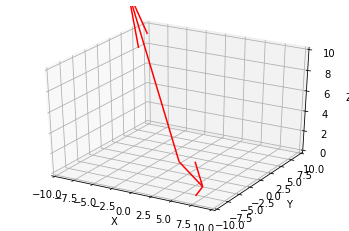

In [233]:
from mpl_toolkits.mplot3d import Axes3D
a = [-.5, .3, .7]
b = [.6, -.8, .2]
data = np.array([[0, 0, 0, -5, 3, 7], 
                 [0, 0, 0, 6, -8, 2]])
X, Y, Z, U, V, W = zip(*data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=2, color = 'red')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [159]:
c = np.array([2, -15, 6, 20])
print((np.linalg.norm(c))**2)
print(np.dot(c, c))
print(c.T * c)
#all quantites is the squar of functions

665.0
665
[  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## d vector example

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

## e vector example

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}) = 2\hat{i} + 11\hat{j}  - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [163]:
## or v_hat = f / (f**2).sum()**0.5
f = np.array([4, 12, 11, 9, 2])
f_hat = f / np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

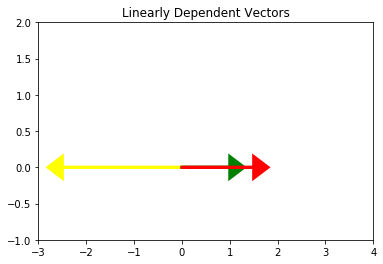

In [205]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-3,4)          
plt.ylim(-1,2)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(-2.5, v)
v3 = np.multiply(1.5,v)

# Plot Vectors and L

plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.3, head_length=0.3, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.3, head_length=0.3, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.3, head_length=0.3, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

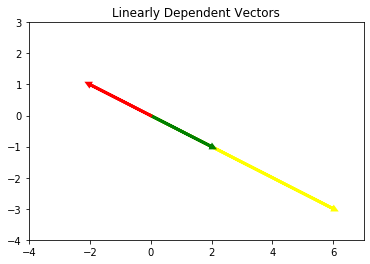

In [234]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-4, 7)          
plt.ylim(-4, 3)

# Original Vector
w = [2,-1] 

# Scaled Vectors
w2 = np.multiply(3, w)
w3 = np.multiply(-1,w)

# Get Vals for L
#axes = plt.gca()
#x_vals = np.array(axes.get_xlim())
#y_vals = 0*x_vals

# Plot Vectors and L
#plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, w2[0], w2[1], linewidth=3, head_width=.09, head_length=0.09, color ='yellow')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.09, head_length=0.09, color ='green')
plt.arrow(0,0, w3[0], w3[1], linewidth=3, head_width=.09, head_length=0.09, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

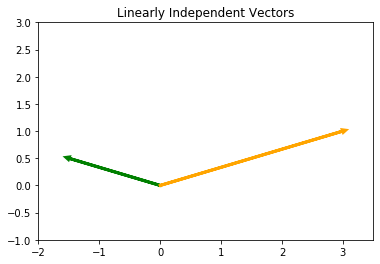

In [235]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')

plt.title("Linearly Independent Vectors")
plt.show()

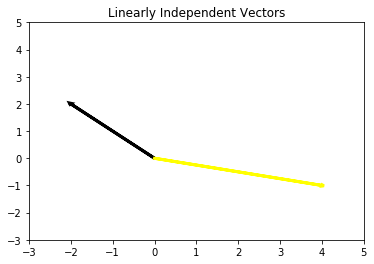

In [236]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-3,5)          
plt.ylim(-3,5)

# Original Vector
o = [-2,2] 
m = [4,-1]

# Plot Vectors
plt.arrow(0,0, o[0], o[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')
plt.arrow(0,0, m[0], m[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

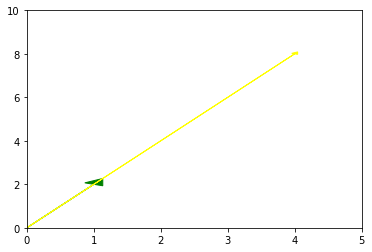

1


In [120]:
plt.xlim(0, 5)
plt.ylim(0, 10)
plt.arrow(0, 0, 1, 2, head_width=.3, head_length=0.3, color ='green')
plt.arrow(0, 0, 4, 8, head_width=.1, head_length=0.1, color ='yellow')

plt.show()


In [122]:
d = np.array([[1, 2], [4, 8]])
np.linalg.matrix_rank(d)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [117]:
df = np.array([[1, 2, 3],
               [-1, 0, 7],
               [4, 8, 2]])
np.linalg.matrix_rank(df)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



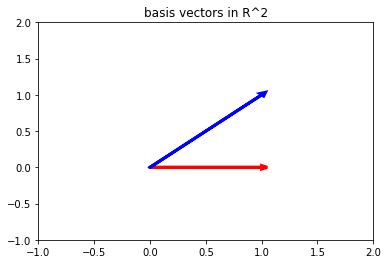

In [212]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# Fix Axes
#plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[1], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [213]:
P = np.array([[1, 2, 3],
               [-1, 0, 7],
               [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

## The rank of a matrix tells us how meny dimensions matrix is.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

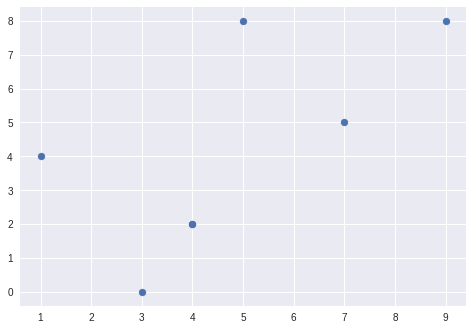

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()